In [11]:
import os
import pandas as pd
%matplotlib inline
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [14]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/will/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=os.getenv('NEWS_API'))
print(newsapi)

# Lotsa Functions
1. get_sentiment_scores
2. get_sentiments_on_topic
3. sentiment_to_df

In [15]:
# Fetch the Bitcoin news articles
def get_sentiment_scores(text, date, source, url):
    sentiment_scores = {}

    # Sentiment scoring with VADER
    text_sentiment = analyzer.polarity_scores(text)
    sentiment_scores["date"] = date
    sentiment_scores["text"] = text
    sentiment_scores["source"] = source
    sentiment_scores["url"] = url
    sentiment_scores["compound"] = text_sentiment["compound"]
    sentiment_scores["positive"] = text_sentiment["pos"]
    sentiment_scores["neutral"] = text_sentiment["neu"]
    sentiment_scores["negative"] = text_sentiment["neg"]
    if text_sentiment["compound"] >= 0.05:  # Positive
        sentiment_scores["normalized"] = 1
    elif text_sentiment["compound"] <= -0.05:  # Negative
        sentiment_scores["normalized"] = -1
    else:
        sentiment_scores["normalized"] = 0  # Neutral

    return sentiment_scores


In [23]:
def get_sentiments_on_topic(topic):
    """ We loke documentation"""
    sentiments_data = []

    # Loop through all the news articles
    for article in newsapi.get_everything(q=topic, language="en", page_size=100)["articles"]:
        try:
            # Get sentiment scoring using the get_sentiment_score() function
            sentiments_data.append(
                get_sentiment_scores(
                    article["content"],
                    article["publishedAt"][:10],
                    article["source"]["name"],
                    article["url"],
                )
            )

        except AttributeError:
            pass

    return sentiments_data

In [24]:
def sentiment_to_df(sentiments):
    
    # Create a DataFrame with the news articles' data and their sentiment scoring results
    news_df = pd.DataFrame(sentiments)

    # Sort the DataFrame rows by date
    news_df = news_df.sort_values(by="date")

    # Define the date column as the DataFrame's index
    news_df.set_index("date", inplace=True)
    return news_df

# Use the functions

In [29]:
topics = ['Bitcoin', 'Ethereum']

btc_sentiment = get_sentiments_on_topic(topics[0])
btc_df = sentiment_to_df(btc_sentiment)
display(btc_df.head())
display("btc_df.describe()")
display(btc_df.describe())

,compound,negative,neutral,normalized,positive,source,text,url
date,,,,,,,,
2019-09-30,-0.7992,0.179,0.821,-1,0.000,Marketwatch.com,The price of bitcoin struggled to remain above...,https://www.marketwatch.com/story/bitcoin-trea...
2019-10-01,-0.8720,0.198,0.802,-1,0.000,The Next Web,The director of Bitcoin escrow service Volanti...,https://thenextweb.com/hardfork/2019/10/01/bit...
2019-10-01,0.6879,0.000,0.883,1,0.117,The Next Web,Our robot colleague Satoshi Nakaboto writes ab...,https://thenextweb.com/hardfork/2019/10/01/sat...
2019-10-01,0.1779,0.057,0.852,1,0.091,The Next Web,Two men have pleaded guilty for conspiring to ...,https://thenextweb.com/hardfork/2019/10/01/bit...
2019-10-01,0.9437,0.000,0.678,1,0.322,The Next Web,"Dyson, maker of very pretty, very effective, a...",https://thenextweb.com/plugged/2019/10/01/dyso...


'btc_df.describe()'

,compound,negative,neutral,normalized,positive
count,97.000000,97.000000,97.000000,97.000000,97.000000
mean,0.013144,0.065103,0.869990,0.072165,0.064897
std,0.520809,0.069117,0.078505,0.960115,0.056852
min,-0.916900,0.000000,0.649000,-1.000000,0.000000
25%,-0.440400,0.000000,0.825000,-1.000000,0.038000
50%,0.025800,0.057000,0.882000,0.000000,0.062000
75%,0.507000,0.103000,0.932000,1.000000,0.077000
max,0.943700,0.293000,1.000000,1.000000,0.322000


In [30]:
eth_sentiment = get_sentiments_on_topic(topics[1])
eth_df = sentiment_to_df(eth_sentiment)
display(eth_df.head())
display(eth_df.describe())

,compound,negative,neutral,normalized,positive,source,text,url
date,,,,,,,,
2019-09-29,-0.3612,0.059,0.941,-1,0.000,Coindesk.com,Ethereum is only now starting to shrug off its...,https://www.coindesk.com/new-interest-in-daos-...
2019-09-29,0.7027,0.000,0.827,1,0.173,Wowebook.org,eBook Details:\r\n<ul><li>Paperback: 328 pages...,https://www.wowebook.org/ethereum-for-web-deve...
2019-09-30,0.5423,0.000,0.897,1,0.103,Logicmag.io,"Inside the Collins household fireplace, undern...",https://logicmag.io/bodies/the-crypto-family-f...
2019-09-30,0.5106,0.000,0.909,1,0.091,Forbes.com,<ul><li>Share to facebook</li><li>Share to twi...,https://www.forbes.com/sites/forbestechcouncil...
2019-09-30,0.6908,0.000,0.853,1,0.147,It-ebooks.info,"Technology is constantly evolving, and blockch...",http://it-ebooks.info/book/1569859160-ethereum...


,compound,negative,neutral,normalized,positive
count,95.000000,95.000000,95.000000,95.000000,95.000000
mean,0.152549,0.032126,0.906505,0.326316,0.061358
std,0.428545,0.051208,0.074042,0.843525,0.060768
min,-0.877900,0.000000,0.652000,-1.000000,0.000000
25%,0.000000,0.000000,0.857000,0.000000,0.000000
50%,0.202300,0.000000,0.917000,1.000000,0.056000
75%,0.459450,0.048000,0.951500,1.000000,0.092000
max,0.906100,0.287000,1.000000,1.000000,0.270000


### Questions:

Q: Which coin had the highest mean positive score?

A: **BTC**

Q: Which coin had the highest compound score?

A: **BTC**

Q. Which coin had the highest positive score?

A:  **BTC**

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [31]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [32]:
# Expand the default stop words list if necessary
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/will/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:

# Complete the tokenizer function
def tokenizer(text):
    """returns a list of words that is lemmatized, stopworded, tokenized, and free of any non-letter characters. """
    # Create a list of the words
    # Convert the words to lowercase
    # Remove the punctuation
    # Remove the stop words
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    return [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in set(stopwords.words('english'))]



In [40]:
# Create a new tokens column for bitcoin
btc_df["tokens"] = btc_df["text"].apply(tokenizer)
btc_df.head()

,compound,negative,neutral,normalized,positive,source,text,url,tokens
date,,,,,,,,,
2019-09-30,-0.7992,0.179,0.821,-1,0.000,Marketwatch.com,The price of bitcoin struggled to remain above...,https://www.marketwatch.com/story/bitcoin-trea...,"[price, bitcoin, struggled, remain, level, sun..."
2019-10-01,-0.8720,0.198,0.802,-1,0.000,The Next Web,The director of Bitcoin escrow service Volanti...,https://thenextweb.com/hardfork/2019/10/01/bit...,"[director, bitcoin, escrow, service, volantis,..."
2019-10-01,0.6879,0.000,0.883,1,0.117,The Next Web,Our robot colleague Satoshi Nakaboto writes ab...,https://thenextweb.com/hardfork/2019/10/01/sat...,"[robot, colleague, satoshi, nakaboto, writes, ..."
2019-10-01,0.1779,0.057,0.852,1,0.091,The Next Web,Two men have pleaded guilty for conspiring to ...,https://thenextweb.com/hardfork/2019/10/01/bit...,"[two, men, pleaded, guilty, conspiring, launde..."
2019-10-01,0.9437,0.000,0.678,1,0.322,The Next Web,"Dyson, maker of very pretty, very effective, a...",https://thenextweb.com/plugged/2019/10/01/dyso...,"[dyson, maker, pretty, effective, expensive, g..."


In [41]:
# Create a new tokens column for ethereum
eth_df["tokens"] = eth_df["text"].apply(tokenizer)
eth_df.head()

,compound,negative,neutral,normalized,positive,source,text,url,tokens
date,,,,,,,,,
2019-09-29,-0.3612,0.059,0.941,-1,0.000,Coindesk.com,Ethereum is only now starting to shrug off its...,https://www.coindesk.com/new-interest-in-daos-...,"[ethereum, starting, shrug, ptsdao, tweeted, a..."
2019-09-29,0.7027,0.000,0.827,1,0.173,Wowebook.org,eBook Details:\r\n<ul><li>Paperback: 328 pages...,https://www.wowebook.org/ethereum-for-web-deve...,"[ebook, detailsullipaperback, pageslilipublish..."
2019-09-30,0.5423,0.000,0.897,1,0.103,Logicmag.io,"Inside the Collins household fireplace, undern...",https://logicmag.io/bodies/the-crypto-family-f...,"[inside, collins, household, fireplace, undern..."
2019-09-30,0.5106,0.000,0.909,1,0.091,Forbes.com,<ul><li>Share to facebook</li><li>Share to twi...,https://www.forbes.com/sites/forbestechcouncil...,"[ullishare, facebooklilishare, twitterlilishar..."
2019-09-30,0.6908,0.000,0.853,1,0.147,It-ebooks.info,"Technology is constantly evolving, and blockch...",http://it-ebooks.info/book/1569859160-ethereum...,"[technology, constantly, evolving, blockchain,..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [47]:
from collections import Counter
from nltk import ngrams

In [48]:
# Generate the Bitcoin N-grams where N=2
flat_btc_tokens = [item for sublist in btc_df.tokens.to_list() for item in sublist]
bigram_counts = Counter(ngrams(flat_btc_tokens, n=2))
bigram_counts.most_common(20)

[(('satoshi', 'nakaboto'), 40),
 (('bitcoin', 'btc'), 26),
 (('char', 'robot'), 20),
 (('robot', 'colleague'), 20),
 (('colleague', 'satoshi'), 20),
 (('nakaboto', 'writes'), 20),
 (('writes', 'bitcoin'), 20),
 (('every', 'fucking'), 20),
 (('fucking', 'daywelcome'), 20),
 (('daywelcome', 'another'), 20),
 (('another', 'edition'), 20),
 (('edition', 'bitcoin'), 20),
 (('bitcoin', 'today'), 20),
 (('today', 'satoshi'), 20),
 (('nakaboto', 'tell'), 20),
 (('tell', 'whats'), 20),
 (('whats', 'going'), 20),
 (('going', 'bitcoin'), 20),
 (('bitcoin', 'past'), 20),
 (('past', 'hour'), 20)]

In [49]:
# Generate the Ethereum N-grams where N=2
flat_eth_tokens = [item for sublist in eth_df.tokens.to_list() for item in sublist]
eth_bigram_counts = Counter(ngrams(flat_eth_tokens, n=2))
eth_bigram_counts.most_common(20)

[(('early', 'morning'), 13),
 (('char', 'ethereumethereum'), 12),
 (('ethereum', 'ended'), 12),
 (('morning', 'intraday'), 10),
 (('ended', 'day'), 10),
 (('saw', 'ethereum'), 9),
 (('start', 'day'), 8),
 (('day', 'saw'), 8),
 (('intraday', 'high'), 7),
 (('ethereumethereum', 'fell'), 6),
 (('smart', 'contract'), 5),
 (('intraday', 'low'), 5),
 (('bitcoin', 'ethereum'), 4),
 (('ethereumethereum', 'rallied'), 4),
 (('sunday', 'ethereum'), 4),
 (('char', 'bitcoin'), 4),
 (('tuesday', 'ethereum'), 4),
 (('day', 'bearish'), 4),
 (('ethereum', 'fall'), 4),
 (('high', 'hitting'), 4)]

In [51]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [53]:
# Get the top 10 words for Bitcoin
token_count(flat_btc_tokens)

[('bitcoin', 102),
 ('char', 97),
 ('satoshi', 44),
 ('nakaboto', 40),
 ('today', 27),
 ('btc', 26),
 ('every', 24),
 ('cryptocurrency', 23),
 ('past', 22),
 ('writes', 21)]

In [54]:
# Get the top 10 words for Ethereum
token_count(flat_eth_tokens)

[('char', 95),
 ('ethereum', 82),
 ('blockchain', 28),
 ('bitcoin', 28),
 ('day', 22),
 ('morning', 19),
 ('cryptocurrency', 15),
 ('early', 15),
 ('ethereumethereum', 12),
 ('ended', 12)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

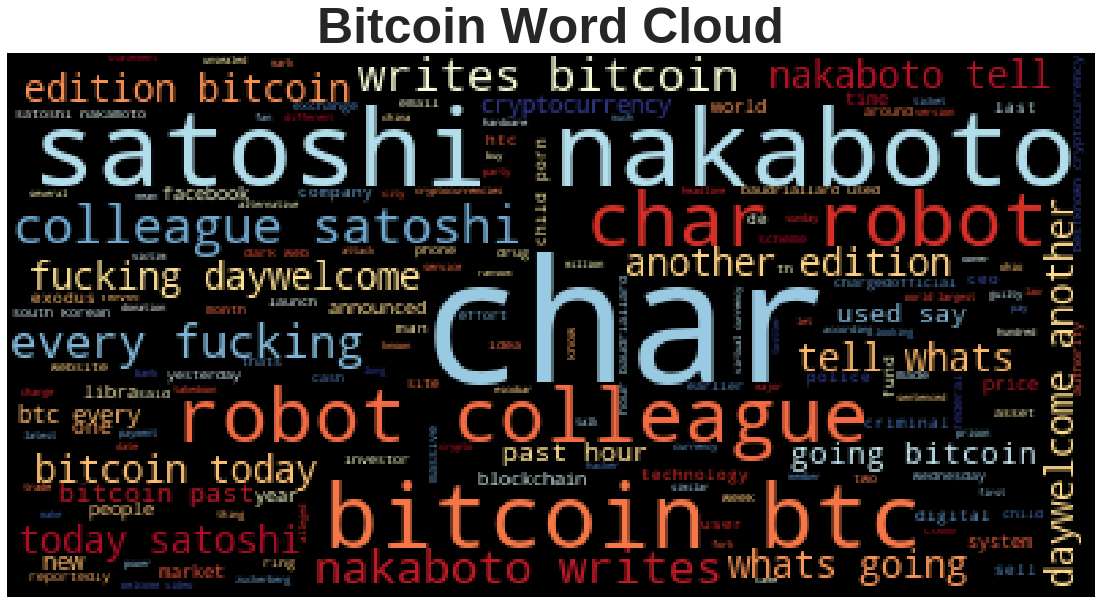

In [71]:
# Generate the Bitcoin word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(" ".join(flat_btc_tokens))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

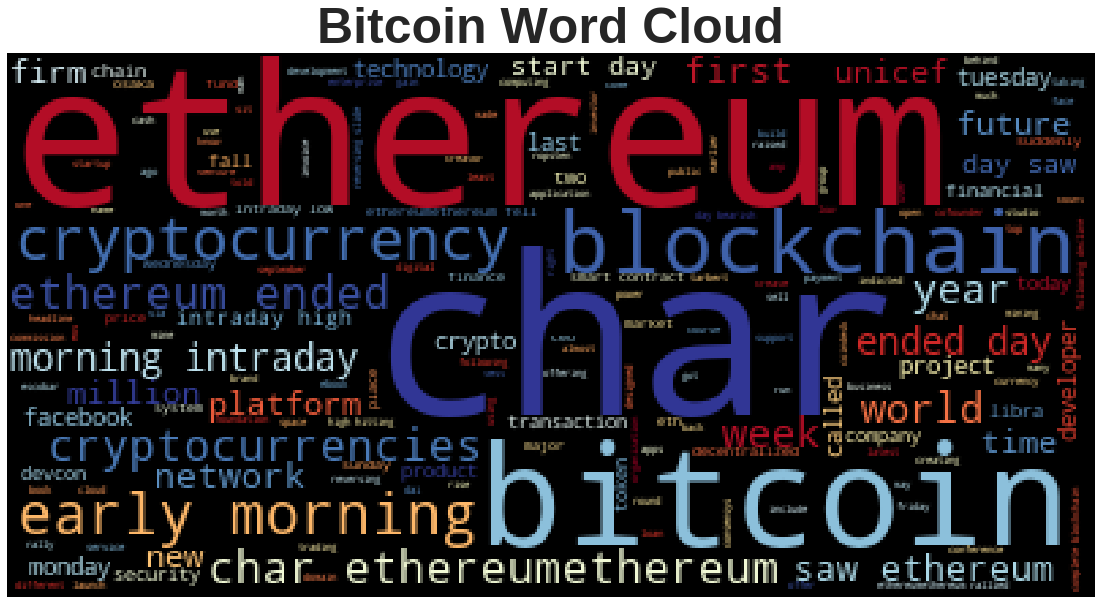

In [72]:
# Generate the Ethereum word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(" ".join(flat_eth_tokens))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [86]:
import spacy
from spacy import displacy


In [75]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [76]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [83]:
# Concatenate all of the bitcoin text together
flat_btc_text_str = " ".join(btc_df.text.to_list())
print(flat_btc_text_str)

The price of bitcoin struggled to remain above the $8,000 level Sunday, following its worst weekly price loss of the year.
Bitcoin 
BTCUSD, -0.02%
  was above $10,000 as recently as last Sunday, but has since fallen about 20%. As of Sunday night, bitcoin w… [+1122 chars] The director of Bitcoin escrow service Volantis Market is facing several years in prison if found guilty of cryptocurrency-related fraud.
According to the US Attorneys Office of the Southern District of New York, Jon Barry Thompson took more than $7 million … [+1422 chars] Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.
Welcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in the past 24 hours. As Habermass used to say: Yolo!
Bitcoin … [+2675 chars] Two men have pleaded guilty for conspiring to launder money using Bitcoin after selling marijuana on the dark web.
Connor Brooke and Aidan Curry, 25 and 23 respectively, gave their 

In [100]:
# Run the NER processor on all of the text
btc_doc = nlp(flat_btc_text_str)
btc_doc.user_data["title"] = "Bitcoin NER"
# Add a title to the document

In [101]:
# Render the visualization
displacy.render(btc_doc,style='ent')

In [89]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

8,000 MONEY
Sunday DATE
weekly DATE
the year DATE
Bitcoin PERSON
BTCUSD ORG
-0.02% PERCENT
above $10,000 MONEY
last Sunday DATE
about 20% PERCENT
Sunday DATE
night TIME
Bitcoin PERSON
Volantis Market PRODUCT
several years DATE
the US Attorneys Office of the Southern District ORG
New York GPE
Jon Barry Thompson PERSON
more than $7 million MONEY
Satoshi Nakaboto PERSON
Bitcoin BTC PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Yolo PERSON
Bitcoin PERSON
Two CARDINAL
Bitcoin PERSON
Connor Brooke PERSON
Aidan Curry PERSON
25 DATE
23 CARDINAL
yesterday DATE
tens of thousands CARDINAL
today DATE
the Pure Cryptomic ORG
Bitcoin GPE
Satoshi Nakamoto PERSON
Bitcoin PERSON
Satoshi Nakaboto PERSON
Bitcoin BTC PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Nikola Tesla PERSON
Bitcoin PERSON
Mt Gox ORG
Alexander Vinnik PERSON
BTC ORG
yesterday DATE
Jacob Appelbaum PERSON
Ingo Wagner / Getty Images ORG
the

---

## Ethereum NER

In [99]:
# Concatenate all of the bitcoin text together
#
# https://spacy.io/usage/visualizers
# colors = {"ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
# options = {"ents": ["ORG"], "colors": colors}
# displacy.serve(doc, style="ent", options=options)
#
flat_eth_text_str = " ".join(eth_df.text.to_list())
#print(flat_eth_text_str)
eth_doc = nlp(flat_eth_text_str)
eth_doc.user_data["title"] = "Ethereum NER"
colors = {"ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"ents": ["ORG"], "colors": colors}
displacy.render(eth_doc,style='ent', options=options)

In [94]:
# Run the NER processor on all of the text

# Add a title to the document

# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

PTSDAO ORG
Ameen Soleimani PERSON
SpankChain ORG
now-$1.2 million CARDINAL
DAO ORG
roughly $60 MONEY
1st DATE
October 23 DATE
2019)</li><li DATE
978-1484252772</li></ul PERCENT
Collins PERSON
nine CARDINAL
Christmas DATE
the winter DATE
a decade ago DATE
Ethereum PRODUCT
Image copyrightSOPA ORG
more than £240,000 MONEY
Ropsten GPE
two CARDINAL
Istanbul GPE
two CARDINAL
Beginning Ethereum Smart Contracts Programming ORG
167 MONEY
yesterday DATE
177.59 MONEY
today DATE
Bitcoin PERSON
BTC ORG
September 24 DATE
0.0191 CARDINAL
BTC ORG
0.0216 CARDINAL
BTC ORG
Forkers PRODUCT
Moonday Mornings PERSON
Hard Forks ORG
1 CARDINAL
Ukrainian NORP
2.60% PERCENT
Sunday DATE
0.26% PERCENT
Saturday DATE
the week DATE
19.79% PERCENT
169.38 MONEY
Ethereum PRODUCT
intraday DATE
175.26 MONEY
mid-afternoon TIME
+4117 GPE
recent years DATE
Petroleos ORG
Ethereum
Ethereum PRODUCT
6.95% PERCENT
Monday DATE
2.60% PERCENT
Sunday DATE
the month DATE
5.4% PERCENT
181.17 MONEY
Ethereum PRODUCT
165.2 MONEY
S3studio/